[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

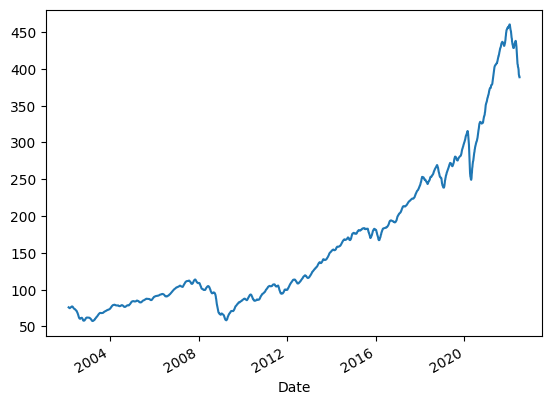

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib as plt

spy = yf.download("SPY", start="2002-01-01", end="2022-06-30")

spy['Adj Close'].rolling(30).mean().plot()

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

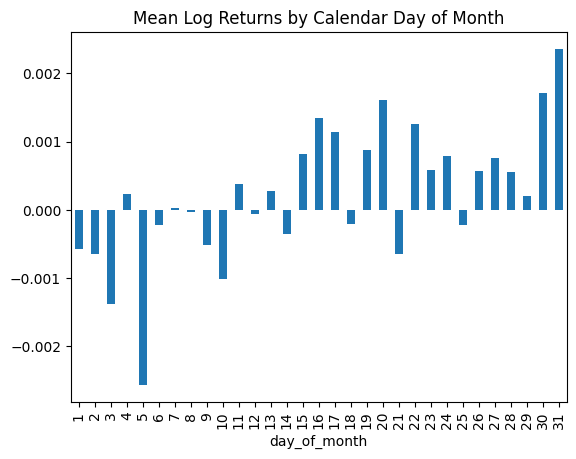

In [22]:
#Download TLT stock data
tlt = yf.download("TLT", start="2002-01-01", end="2022-06-30")

#compute log returns (so we can add together later)
tlt["log_return"] = np.log(tlt['Adj Close'] / tlt['Adj Close'].shift(1))

#add column with the day of the month
tlt["day_of_month"] = tlt.index.day

#add column with the year
tlt["year"] = tlt.index.year

#group by number of month
grouped_by_day = tlt.groupby("day_of_month").log_return.mean()

#plot mean returns across entire sample
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

<Axes: title={'center': 'Mean Log Strategy Returns by Year'}, xlabel='year'>

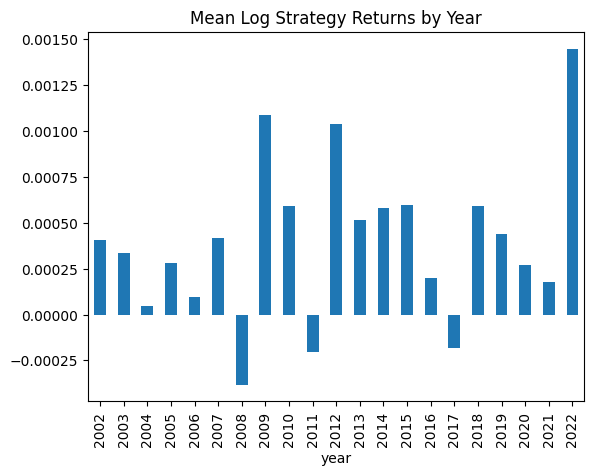

In [23]:
#first weeks returns
tlt["first_week_returns"] = 0.0
tlt.loc[tlt.day_of_month <= 7, "first_week_returns"] = tlt[tlt.day_of_month <= 7].log_return

#last weeks returns
tlt["last_week_returns"] = 0.0
tlt.loc[tlt.day_of_month >= 23, "last_week_returns"] = tlt[tlt.day_of_month >= 23].log_return

#last week minus first week
tlt["last_week_less_first_week"] = (tlt.last_week_returns - tlt.first_week_returns)

#plot by year
tlt.groupby("year").last_week_less_first_week.mean().plot.bar(title="Mean Log Strategy Returns by Year")


<Axes: title={'center': 'Cumulative Sum of Returns By Year'}, xlabel='year'>

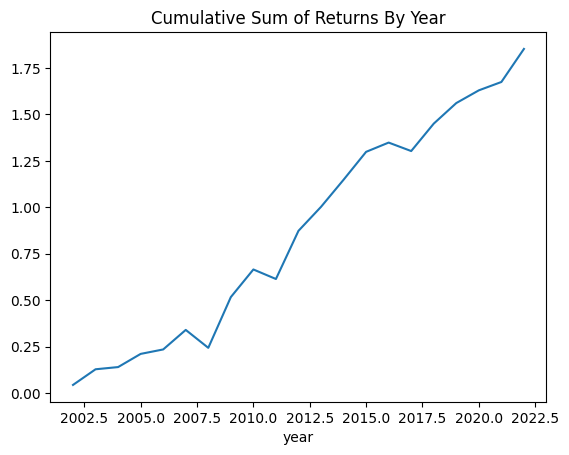

In [24]:
#cumulative over the years
tlt.groupby("year").last_week_less_first_week.sum().cumsum().plot(title="Cumulative Sum of Returns By Year")

<Axes: title={'center': 'Cumulative Sum of Returns By Day'}, xlabel='Date'>

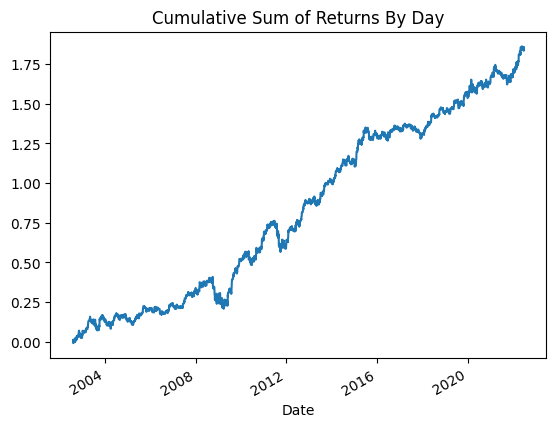

In [25]:
#Cumalitive by day
tlt.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day")


<Axes: title={'center': 'Cumulative Sum of Returns By Year'}, xlabel='Date'>

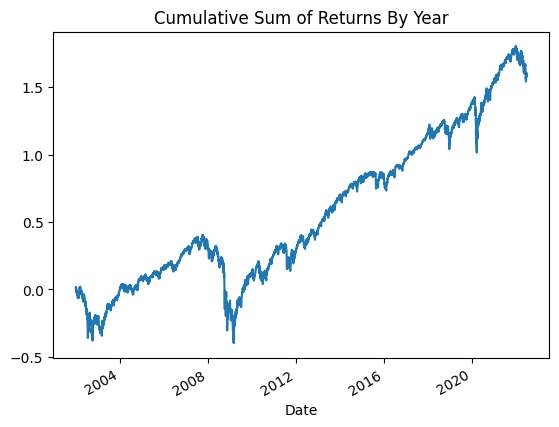

In [26]:
#Compare to SPY from the same time period
spy["log_return"] = np.log(spy['Adj Close'] / spy['Adj Close'].shift(1))
spy["day_of_month"] = spy.index.day
grouped_by_day = spy.groupby("day_of_month").log_return.mean()

spy.log_return.cumsum().plot(title="Cumulative Sum of Returns By Year")

<Axes: title={'center': 'Cumulative Sum of Returns By Day'}, xlabel='Date'>

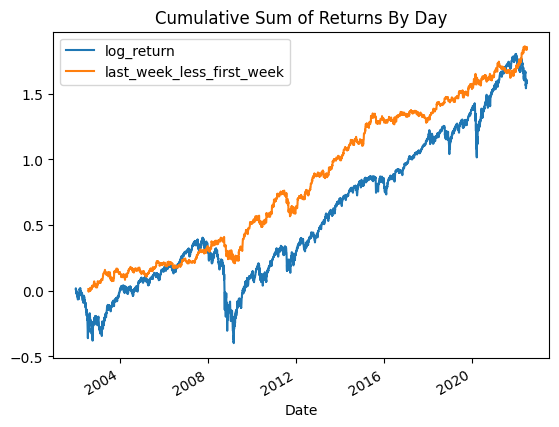

In [29]:
spy.log_return.cumsum().plot(title="Cumulative Sum of Returns By Year", legend=True)
tlt.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day", legend=True)
